In [1]:
from xmip.preprocessing import combined_preprocessing
from xmip.utils import google_cmip_col
from xmip.postprocessing import match_metrics
import matplotlib.pyplot as plt


In [2]:
col = google_cmip_col()
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [7]:
col.df['experiment_id'].unique()

array(['highresSST-present', 'piControl', 'control-1950', 'hist-1950',
       'historical', 'amip', 'abrupt-4xCO2', 'abrupt-2xCO2',
       'abrupt-0p5xCO2', '1pctCO2', 'ssp585', 'esm-piControl', 'esm-hist',
       'hist-piAer', 'histSST-1950HC', 'ssp245', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'piClim-histall', 'hist-piNTCF', 'histSST-piNTCF',
       'aqua-control-lwoff', 'piClim-lu', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'faf-heat-NA0pct', 'ssp370SST-lowCH4', 'piClim-VOC',
       'ssp370-lowNTCF', 'piClim-control', 'piClim-aer', 'hist-aer',
       'faf-heat', 'faf-heat-NA50pct', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'piClim-ghg', 'piClim-anthro', 'faf-all', 'hist-nat', 'hist-GHG',
       'ssp119', 'piClim-histnat', 'piClim-4xCO2', 'ssp370',
       'piClim-histghg', 'highresSST-future', 'esm-ssp585-

In [4]:
col.df['source_id'].unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

In [5]:
cat = col.search(
    variable_id='tos', # ocean surface temperature
    table_id='Omon',
    experiment_id='historical',
    source_id=['GFDL-ESM4'],
)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,3
table_id,1
variable_id,1
grid_label,2
zstore,6
dcpp_init_year,0


In [8]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
2,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
3,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
4,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726
5,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [9]:
cat.df['member_id'].unique()

array(['r3i1p1f1', 'r2i1p1f1', 'r1i1p1f1'], dtype=object)

In [10]:
cat.df['grid_label'].unique()

array(['gr', 'gn'], dtype=object)

In [11]:
# create a smaller catalog from the full collection using faceted search
cat = col.search(
    variable_id='tos', # Ocean surface temperature
    experiment_id='historical', # only runs for the historical forcing period
    table_id='Omon', # monthly oceanic data
    grid_label='gn', #native model grid only
    source_id=['IPSL-CM6A-LR', 'MRI-ESM2-0', 'GFDL-ESM4'], # only choosing a few models here, there are many more!
    member_id=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'], #lets restrict us here to only a few members, you can modify this later to experiment.
)

# read all datasets into a dictionary but apply the xmip preprocessing before
ddict = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True},
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r3i1p1f1.Omon.gn.none.tos:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r3i1p1f1.Omon.gn.none.tos:While renaming to target `lat_bounds`, more than one candidate was found ['y_bnds', 'vertices_latitude']. Renaming y_bnds to lat_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r1i1p1f1.Omon.gn.none.tos:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(

In [12]:
list(ddict.keys())

['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']

In [13]:
ddict['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']

<xarray.Dataset> Size: 3GB
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 332,
                     x: 362, bnds: 2, vertex: 4)
Coordinates: (12/13)
    area            (y, x) float32 481kB dask.array<chunksize=(332, 362), meta=np.ndarray>
    lat             (y, x) float32 481kB dask.array<chunksize=(332, 362), meta=np.ndarray>
    lon             (y, x) float32 481kB dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    time_bounds     (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_verticies   (y, x, vertex) float32 2MB dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    ...              ...
  * y               (y) int64 3kB 0 1 2 3 4 5 6 ... 325 326 327 328 329 330 331
  * x               (x) int64 3kB 0 1 2 3 4 5 6 ... 355 356 357 358 359 360 361
    lon_bounds      (bnds, y, x) float32 961kB dask.array<chunksize=(1, 332, 362), meta=np.ndarray>
    lat_bounds      (bnds, y, x) float32 961kB dask.array<chunksize=(1, 332, 362), meta=np.ndarray>
  * member_id       (member_id) object 24B 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds, vertex
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 3GB dask.array<chunksize=(1, 1, 251, 332, 362), meta=np.ndarray>
Attributes: (12/52)
    CMIP6_CV_version:                 cv=6.2.3.5-2-g63b123e
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            historical
    NCO:                              "4.6.0"
    activity_id:                      CMIP
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20180803
    intake_esm_attrs:_data_format_:   zarr
    variant_info:                     Restart from another point in piControl...
    intake_esm_dataset_key:           CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn

In [14]:
ddict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

<xarray.Dataset> Size: 10GB
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 576,
                     x: 720, vertex: 4, bnds: 2)
Coordinates:
    lat             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
    lon             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
  * x               (x) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * y               (y) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
    lat_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    lon_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    time_bounds     (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    lat_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
  * member_id       (member_id) object 24B 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: vertex, bnds
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 10GB dask.array<chunksize=(1, 1, 64, 576, 720), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omo...

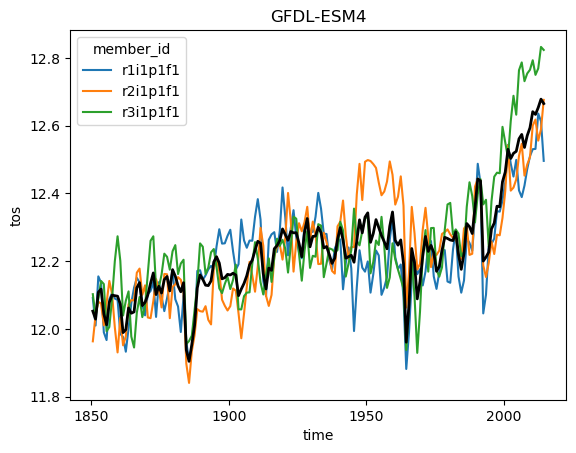

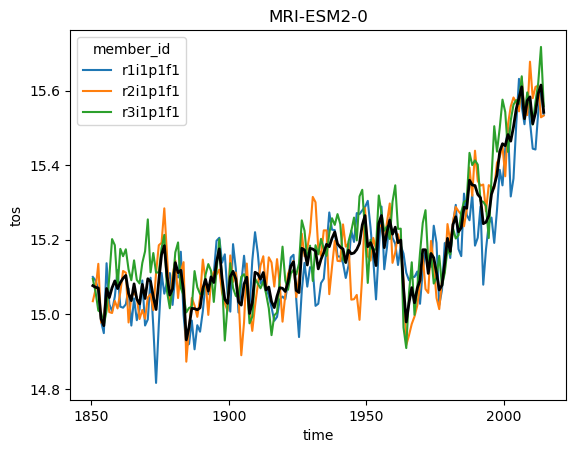

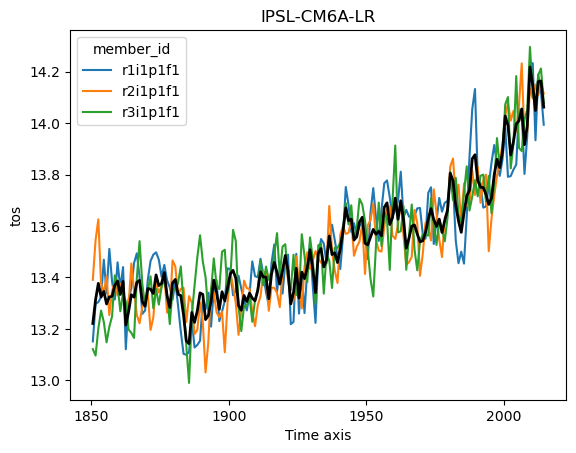

In [15]:
for name, ds in ddict.items():
    # construct yearly global mean timeseries
    mean_temp = ds.tos.mean(['x', 'y']).coarsen(time=12).mean()
    plt.figure()
    mean_temp.plot(hue='member_id')
    # lets also plot the average over all members
    mean_temp.mean('member_id').plot(color='k', linewidth=2)
    plt.title(ds.attrs['source_id']) #Extract the model name right from the dataset metadata
    plt.show()

In [16]:
# Repeat the above steps to get the cell area matching the temperature we loaded earlier
cat_area = col.search(
    variable_id='areacello', # the cell area is a different variable in the collection
    table_id='Ofx', # since area is not varying in time we need to specify a different table_id
    experiment_id='historical', # Same as before
    grid_label='gn', # Same as before
    source_id=['IPSL-CM6A-LR', 'MRI-ESM2-0', 'GFDL-ESM4'], # Same as before
    member_id=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'], # Same as before
)
# read all datasets into a dictionary (make sure to apply the same preprocessing as before!)
ddict_area = cat_area.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True}
) 


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r2i1p1f1.Ofx.gn.none.areacello:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r2i1p1f1.Ofx.gn.none.areacello:While renaming to target `lat_bounds`, more than one candidate was found ['y_bnds', 'vertices_latitude']. Renaming y_bnds to lat_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r3i1p1f1.Ofx.gn.none.areacello:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
 

In [17]:
list(ddict_area.keys())

['CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Ofx.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Ofx.gn']

In [18]:
ddict_w_area = match_metrics(ddict, ddict_area, 'areacello', dim_length_conflict='align')


/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/postprocessing.py:89: UserWarning: Match attributes ['variant_label'] not found in any of the datasets.         This can happen when several combination functions are used and attributes are removed during merging.         Double check the results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/postprocessing.py:591: UserWarning: CMIP.NOAA-GFDL.GFDL-ESM4.historical.none.Omon.gn.none.tos:`metric` dimensions ['member_id:1'] do not match `ds` ['member_id:3']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")


In [19]:
ddict

{'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn': <xarray.Dataset> Size: 10GB
 Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 576,
                      x: 720, vertex: 4, bnds: 2)
 Coordinates:
     lat             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
     lon             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
   * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
   * x               (x) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
   * y               (y) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
     lat_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
     lon_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
     time_bounds     (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
     lon_bounds      (bnds, y, x) float32 3MB dask.array<chunksize

In [20]:
ddict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

<xarray.Dataset> Size: 10GB
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 576,
                     x: 720, vertex: 4, bnds: 2)
Coordinates:
    lat             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
    lon             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
  * x               (x) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * y               (y) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
    lat_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    lon_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    time_bounds     (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    lat_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
  * member_id       (member_id) object 24B 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: vertex, bnds
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 10GB dask.array<chunksize=(1, 1, 64, 576, 720), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omo...

In [21]:
ddict_w_area['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

<xarray.Dataset> Size: 3GB
Dimensions:         (time: 1980, x: 720, y: 576, member_id: 1,
                     dcpp_init_year: 1, vertex: 4, bnds: 2)
Coordinates: (12/13)
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
  * x               (x) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * y               (y) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    lat             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
    ...              ...
    lat_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    lon_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    time_bounds     (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    lat_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    areacello       (member_id, dcpp_init_year, y, x) float32 2MB dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
Dimensions without coordinates: vertex, bnds
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 3GB dask.array<chunksize=(1, 1, 64, 576, 720), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omo...

In [22]:
ddict_w_area['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

<xarray.Dataset> Size: 3GB
Dimensions:         (time: 1980, x: 720, y: 576, member_id: 1,
                     dcpp_init_year: 1, vertex: 4, bnds: 2)
Coordinates: (12/13)
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
  * x               (x) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * y               (y) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    lat             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
    ...              ...
    lat_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    lon_verticies   (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    time_bounds     (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    lat_bounds      (bnds, y, x) float32 3MB dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    areacello       (member_id, dcpp_init_year, y, x) float32 2MB dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
Dimensions without coordinates: vertex, bnds
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 3GB dask.array<chunksize=(1, 1, 64, 576, 720), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omo...

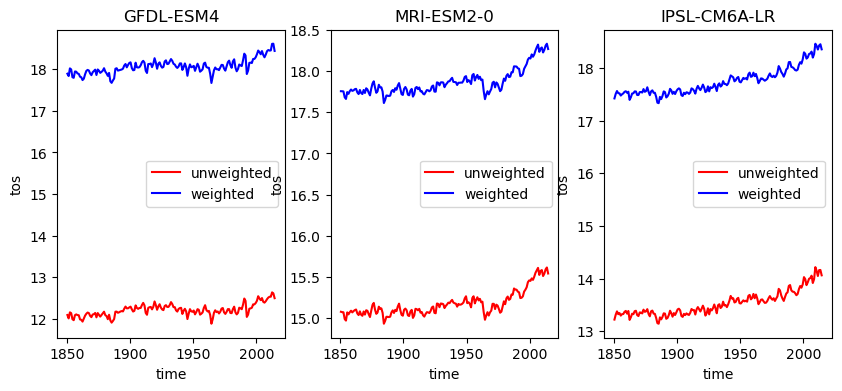

In [23]:
plt.figure(figsize=[10, 4])
for i, (name, ds) in enumerate(ddict_w_area.items()):
    plt.subplot(1,3,i+1)
    # construct yearly global mean timeseries
    mean_temp = ds['tos'].mean(['x', 'y']).coarsen(time=12).mean()
    weights = ds.areacello.fillna(0) # ocean area can contain nans, which are not allowed for weighting
    mean_temp_weighted = ds['tos'].weighted(weights).mean(['x', 'y']).coarsen(time=12).mean()
    # lets look at the difference
    mean_temp.mean('member_id').plot(label = 'unweighted', color='r')
    mean_temp_weighted.mean('member_id').plot(label = 'weighted', color='b')
    plt.title(ds.attrs['source_id'])
    plt.legend()

Text(0.5, 1.0, 'Global average sea surface temperature')

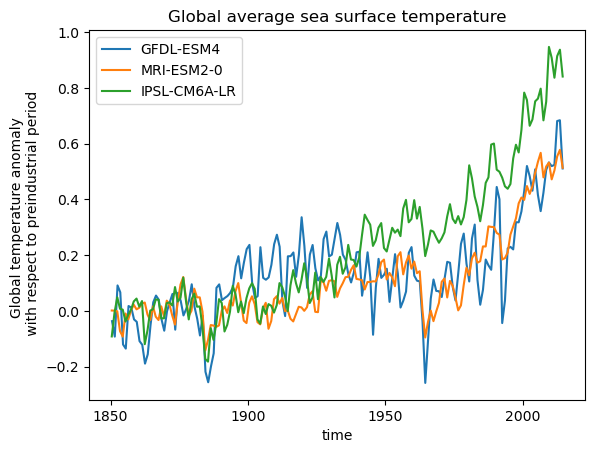

In [24]:
plt.figure()
timeseries_dict = {}
for name, ds in ddict_w_area.items():
    # construct yearly global mean timeseries
    weights = ds.areacello.fillna(0)
    mean_temp_weighted = ds['tos'].weighted(weights).mean(['x', 'y']).coarsen(time=12).mean()
    anomaly = mean_temp_weighted - mean_temp_weighted.sel(time=slice('1850', '1900')).mean('time')
    anomaly.mean('member_id').plot(label = ds.attrs['source_id'])
plt.legend()
plt.ylabel('Global temperature anomaly \n with respect to preindustrial period')
plt.title('Global average sea surface temperature')